**Importing the Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)

**Loading the dataset**

In [2]:
data = pd.read_csv("/Users/sachingarg/Downloads/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Dropping the categorical feature from the dataframe for further analysis

In [3]:
data.drop(['car name'],axis=1,inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**Summary of the dataset**

In [4]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Data Preprocessing**

1. Checking for null values in the dataset

In [5]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [6]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

* There are** no null values** in our dataset.
But the ** horsepower ** feature in our dataframe contains '?' which need to be removed from the dataframe , so we will **drop the rows **in the dataframe where horsepower is equal to '?'.

In [7]:
data = data[data.horsepower != '?']

In [8]:
# Checking for null values after dropping the rows
'?' in data

False

In [9]:
data.shape

(392, 8)

After dropping the rows containing horsepower as '?', now we are left with 392 rows.

Here , I am checking the correlation of all the features of the dataset w.r.t miles-per-gallon i.e.** 'mpg'** and arranging the values in ascending order.

In [10]:
data.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

**Heatmap of correlation matrix**

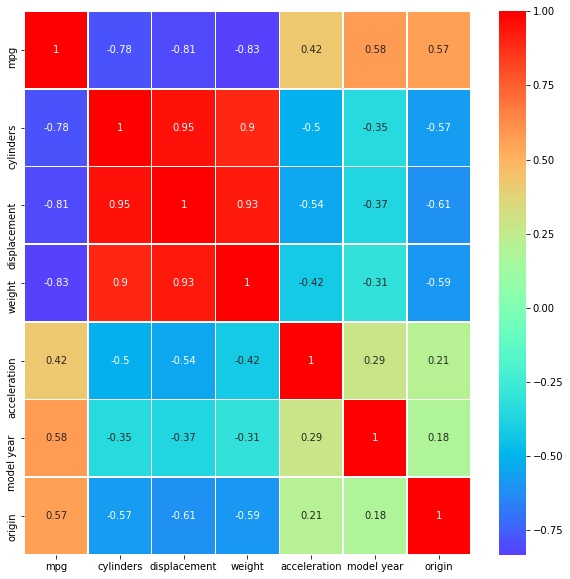

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()

**Univariate Analysis**

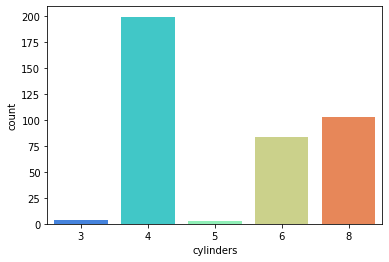

In [12]:
sns.countplot(data.cylinders,data=data,palette = "rainbow")
plt.show()

From the above above plot we can visualize that there are ** maximum number of 4 cylinder** vehicles.
Around **98% of the vehicles are either of 4, 6, 8 cylinders** and only small percent of vehicles are either  of 3 and 5 cylinders.

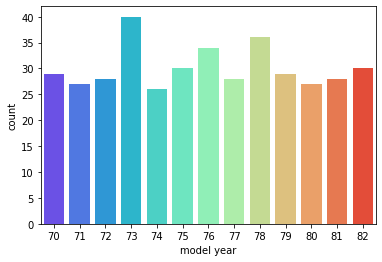

In [13]:
sns.countplot(data['model year'],palette = "rainbow")
plt.show()

**Maximum number of** vehicles are of the **year 1973** and **minumum number** of the **year 1974**.

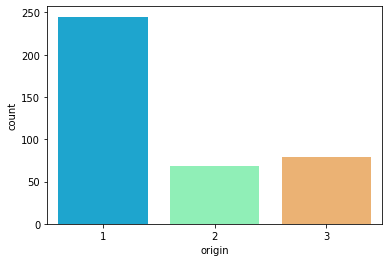

In [14]:
sns.countplot(data.origin,palette = "rainbow")
plt.show()

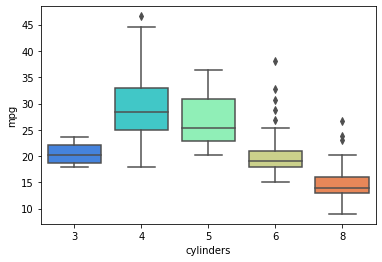

In [15]:
## multivariate analysis
sns.boxplot(y='mpg',x='cylinders',data=data,palette = "rainbow")
plt.show()

We can easily visualize that the mileage per gallon (mpg) of 4 cylinder vehicles is maximum and we also saw that most of the vehicles are 4 cylinder.
- From the above result we can carry out the inference that for most of the people** mileage(mpg) **is one of the major factor while buying a vehicle.

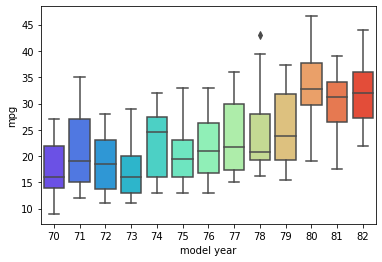

In [16]:
sns.boxplot(y='mpg',x='model year',data=data,palette = "rainbow")
plt.show()

** Modelling**

In [20]:
X = data.iloc[:,1:].values
Y = data.iloc[:,0].values

Splitting the dataset into training and test set.

**1. Multivariate Regression**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
Y_pred = regressor.predict(X_test)
print(regressor.score(X_test,Y_test))

0.8191428142279117


**Polynomial regression**

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X_poly,Y,test_size=0.30)

lin_reg = LinearRegression()
lin_reg  = lin_reg.fit(X_train,Y_train)

print(lin_reg.score(X_test,Y_test))

0.859517454007391


**Conclusion**

The accuracy score improves in case of polynomial regression compared to linear regression as it fits the data better. In this exercise you learned to perform the folllowing:
1. Load the dataset
2. Univariate analysis
3. Multivariate analysis
4. Linear regression
5. Polynomial regression